In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
import statsmodels.api as sm
import numpy as np 
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
import imageio
import os
from statsmodels.graphics.tsaplots import plot_acf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
import pandas as pd

In [4]:
agri_data=pd.read_excel('/content/drive/MyDrive/Agri/FPData v1.0.xlsx')
agri_data.head()

,Date,COMM_NAME,COMM_CODE,COMM_CATEGORY,COMM_WT,Monthly Price
0,2011-04-01,Paddy,1101010101,CEREALS,1.43052,97.5
1,2011-04-01,Wheat,1101010102,CEREALS,1.02823,101.1
2,2011-04-01,Jowar,1101010103,CEREALS,0.06764,84.5
3,2011-04-01,Bajra,1101010104,CEREALS,0.08637,97.7
4,2011-04-01,Maize,1101010105,CEREALS,0.18927,98.2


In [5]:
agri_data.dtypes

Date             datetime64[ns]
COMM_NAME                object
COMM_CODE                 int64
COMM_CATEGORY            object
COMM_WT                 float64
Monthly Price           float64
dtype: object

In [6]:
#agri_data['Date'] = pd.to_datetime(agri_data['Date'])
#agri_data.head()

In [7]:
# extract month and year from dates
agri_data['Month'] = [i.month for i in agri_data['Date']]
agri_data['year'] = [i.year for i in agri_data['Date']]
agri_data['flag'] = pd.Series(np.where(agri_data['Date'] >= np.datetime64('2020-03-03'), 1, 0)) #flag for COVID-19
agri_data.head()

,Date,COMM_NAME,COMM_CODE,COMM_CATEGORY,COMM_WT,Monthly Price,Month,year,flag
0,2011-04-01,Paddy,1101010101,CEREALS,1.43052,97.5,4,2011,0
1,2011-04-01,Wheat,1101010102,CEREALS,1.02823,101.1,4,2011,0
2,2011-04-01,Jowar,1101010103,CEREALS,0.06764,84.5,4,2011,0
3,2011-04-01,Bajra,1101010104,CEREALS,0.08637,97.7,4,2011,0
4,2011-04-01,Maize,1101010105,CEREALS,0.18927,98.2,4,2011,0


In [8]:
agri_data.columns

Index(['Date', 'COMM_NAME', 'COMM_CODE', 'COMM_CATEGORY', 'COMM_WT',
       'Monthly Price', 'Month', 'year', 'flag'],
      dtype='object')

In [9]:
target='Monthly Price'

In [10]:
agri_data = agri_data.drop(columns=['COMM_WT','COMM_CODE'])
agri_data.columns

Index(['Date', 'COMM_NAME', 'COMM_CATEGORY', 'Monthly Price', 'Month', 'year',
       'flag'],
      dtype='object')

In [11]:
agri_data.set_index('Date', inplace=True)
agri_data.head()

,COMM_NAME,COMM_CATEGORY,Monthly Price,Month,year,flag
Date,,,,,,
2011-04-01,Paddy,CEREALS,97.5,4,2011,0
2011-04-01,Wheat,CEREALS,101.1,4,2011,0
2011-04-01,Jowar,CEREALS,84.5,4,2011,0
2011-04-01,Bajra,CEREALS,97.7,4,2011,0
2011-04-01,Maize,CEREALS,98.2,4,2011,0


In [12]:
# split data into train-test set
train = agri_data[agri_data['year'] < 2020]
test = agri_data[agri_data['year'] >= 2020]
# check shape
train.shape, test.shape

((7140, 6), (1224, 6))

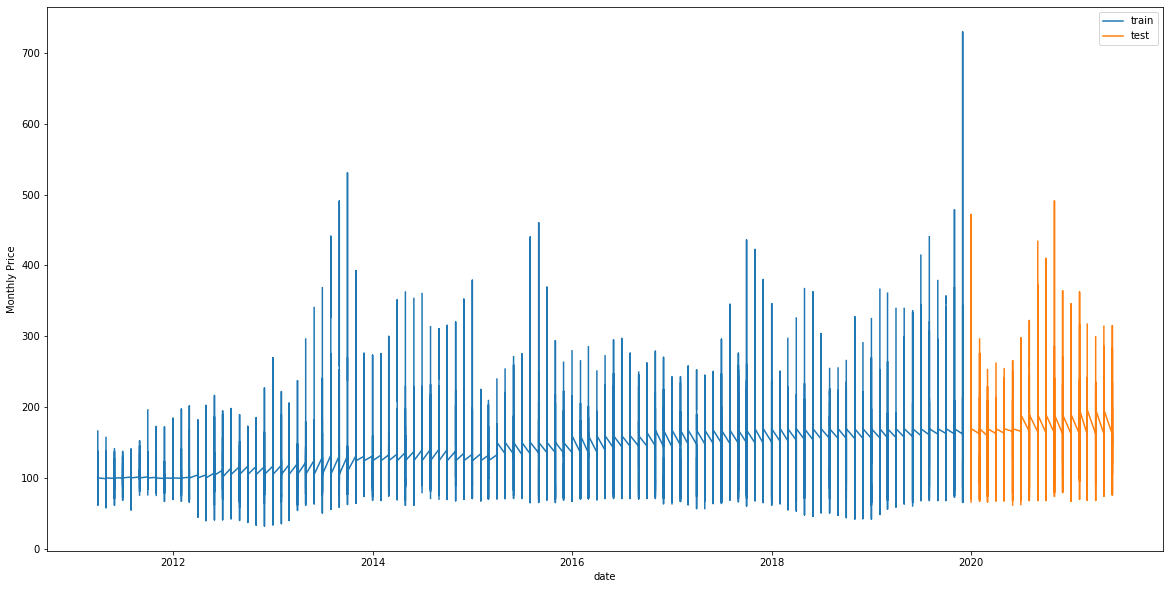

In [13]:
plt.figure(figsize=(20,10))
plt.xlabel('date')
plt.ylabel('Monthly Price')
plt.plot(train.index,train['Monthly Price'],label='train')
plt.plot(test.index,test['Monthly Price'],label='test')
plt.legend()
plt.show()

In [14]:
train.columns

Index(['COMM_NAME', 'COMM_CATEGORY', 'Monthly Price', 'Month', 'year', 'flag'], dtype='object')

In [15]:
#!pip install pycaret

In [16]:
from pycaret.regression import *

In [17]:
reg = setup(data = train, 
             target = 'Monthly Price',
             numeric_imputation = 'mean',
             categorical_features = ['COMM_NAME','Month','year','COMM_CATEGORY']  , 
            transformation = True, 
                  combine_rare_levels = True, rare_level_threshold = 0.1,
             silent = True,remove_multicollinearity = True, multicollinearity_threshold = 0.95,data_split_shuffle = False)

,Description,Value
0,session_id,8581
1,Target,Monthly Price
2,Original Data,"(7140, 6)"
3,Missing Values,True
4,Numeric Features,0
5,Categorical Features,5
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(4778, 57)"


In [18]:
# returns best models - takes a little time to run
top3 = compare_models(n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,23.7808,1.201754e+03,33.8421,8.170000e-02,0.2454,0.1947,0.128
lightgbm,Light Gradient Boosting Machine,23.4376,1.168110e+03,33.5410,6.000000e-02,0.2416,0.1894,0.074
rf,Random Forest Regressor,23.6092,1.237891e+03,34.5076,9.300000e-03,0.2475,0.1900,0.447
br,Bayesian Ridge,25.1987,1.310605e+03,35.5439,-5.460000e-02,0.2585,0.2058,0.024
ridge,Ridge Regression,25.2699,1.312685e+03,35.6053,-6.600000e-02,0.2595,0.2064,0.019
huber,Huber Regressor,24.7975,1.387758e+03,36.3676,-7.460000e-02,0.2599,0.1936,0.055
omp,Orthogonal Matching Pursuit,26.5529,1.446756e+03,37.1130,-9.850000e-02,0.2691,0.2182,0.019
par,Passive Aggressive Regressor,26.4218,1.451987e+03,37.4745,-1.832000e-01,0.2712,0.2153,0.023
knn,K Neighbors Regressor,25.9792,1.436095e+03,37.1466,-1.975000e-01,0.2668,0.2041,0.069
et,Extra Trees Regressor,26.0920,1.647747e+03,39.8541,-3.790000e-01,0.2752,0.2092,0.471


In [19]:
best = compare_models(sort = 'RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,23.4376,1.168110e+03,33.5410,6.000000e-02,0.2416,0.1894,0.032
gbr,Gradient Boosting Regressor,23.7808,1.201754e+03,33.8421,8.170000e-02,0.2454,0.1947,0.131
rf,Random Forest Regressor,23.6092,1.237891e+03,34.5076,9.300000e-03,0.2475,0.1900,0.438
br,Bayesian Ridge,25.1987,1.310605e+03,35.5439,-5.460000e-02,0.2585,0.2058,0.025
ridge,Ridge Regression,25.2699,1.312685e+03,35.6053,-6.600000e-02,0.2595,0.2064,0.019
huber,Huber Regressor,24.7975,1.387758e+03,36.3676,-7.460000e-02,0.2599,0.1936,0.056
omp,Orthogonal Matching Pursuit,26.5529,1.446756e+03,37.1130,-9.850000e-02,0.2691,0.2182,0.019
knn,K Neighbors Regressor,25.9792,1.436095e+03,37.1466,-1.975000e-01,0.2668,0.2041,0.066
par,Passive Aggressive Regressor,26.4218,1.451987e+03,37.4745,-1.832000e-01,0.2712,0.2153,0.021
lasso,Lasso Regression,28.5210,1.564475e+03,38.9765,-4.093000e-01,0.2835,0.2398,0.019


In [20]:
#we create a model using light gbm
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,14.1347,493.5691,22.2164,-0.6870,0.1898,0.1367
1,16.4726,554.4783,23.5474,-0.0933,0.2140,0.1634
2,19.7773,709.5217,26.6368,0.0783,0.2532,0.2073
3,22.6920,1187.5578,34.4610,0.4255,0.2501,0.2040
4,27.0273,1640.6685,40.5052,0.2198,0.2673,0.2103
5,26.5572,1542.0651,39.2691,0.2249,0.2491,0.1785
6,23.5403,1132.5534,33.6534,0.1984,0.2241,0.1742
7,27.0994,1493.7016,38.6484,0.1998,0.2460,0.2003
8,26.5296,1369.7445,37.0101,0.1360,0.2434,0.1857
9,30.5454,1557.2345,39.4618,-0.1026,0.2787,0.2334


In [21]:
tuned_lightgbm = tune_model(lightgbm) 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,14.8497,435.7270,20.8741,-0.4893,0.2034,0.1452
1,17.5993,681.1147,26.0982,-0.3429,0.2361,0.1732
2,19.8818,740.2927,27.2083,0.0383,0.2578,0.2101
3,23.2478,1173.8280,34.2612,0.4321,0.2496,0.2051
4,26.8016,1573.5281,39.6677,0.2518,0.2631,0.2100
5,26.3436,1415.9535,37.6292,0.2883,0.2424,0.1854
6,23.8528,1190.2299,34.4997,0.1575,0.2288,0.1741
7,26.8558,1464.1388,38.2641,0.2156,0.2457,0.1990
8,27.3477,1418.8310,37.6674,0.1050,0.2466,0.1909
9,30.7935,1585.5168,39.8185,-0.1226,0.2812,0.2303


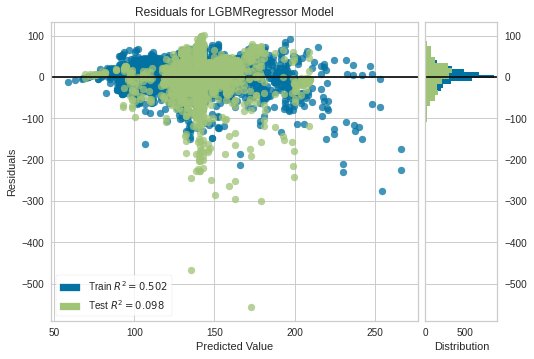

In [22]:
plot_model(lightgbm)

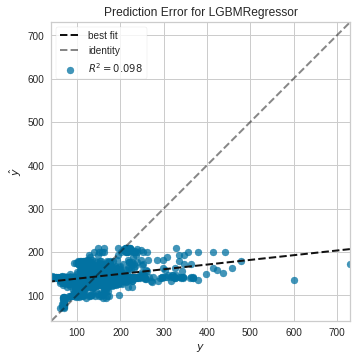

In [23]:
plot_model(lightgbm, plot = 'error')

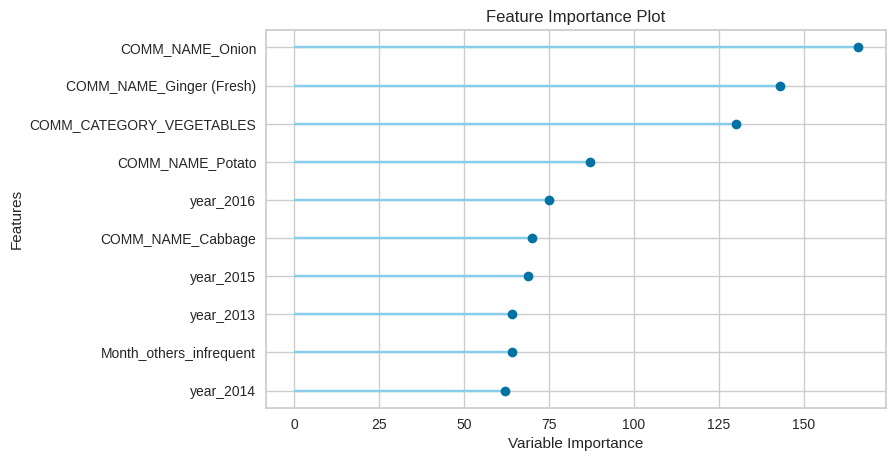

In [24]:
plot_model(tuned_lightgbm, plot='feature') # 

In [25]:
predict_model(tuned_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,34.5012,2654.5788,51.5226,0.0795,0.3108,0.2459


In [26]:
final_lightgbm = finalize_model(tuned_lightgbm)

In [27]:
#Final Light Gradient Boosting Machine parameters for deployment
print(final_lightgbm)

LGBMRegressor(bagging_fraction=0.6, bagging_freq=2, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
              importance_type='split', learning_rate=0.15, max_depth=-1,
              min_child_samples=16, min_child_weight=0.001, min_split_gain=0.3,
              n_estimators=300, n_jobs=-1, num_leaves=8, objective=None,
              random_state=8581, reg_alpha=0.05, reg_lambda=0.0001,
              silent='warn', subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)


In [28]:
predict_model(final_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,30.9944,2125.896,46.1074,0.2628,0.2879,0.2325


In [29]:
unseen_predictions = predict_model(final_lightgbm, data=test)
unseen_predictions.head()
unseen_predictions.loc[unseen_predictions['Label'] < 0, 'Label'] = 0 #removing any negative values

In [30]:
def plot_series(time, series,i, format="-", start=0, end=None):
    #plt.figure(figsize=(20,10))
    plt.plot(time[start:end], series[start:end], format,label=i)
    plt.xlabel("Date")
    plt.ylabel("Monthly Price (Rupees)")
    plt.legend()

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime

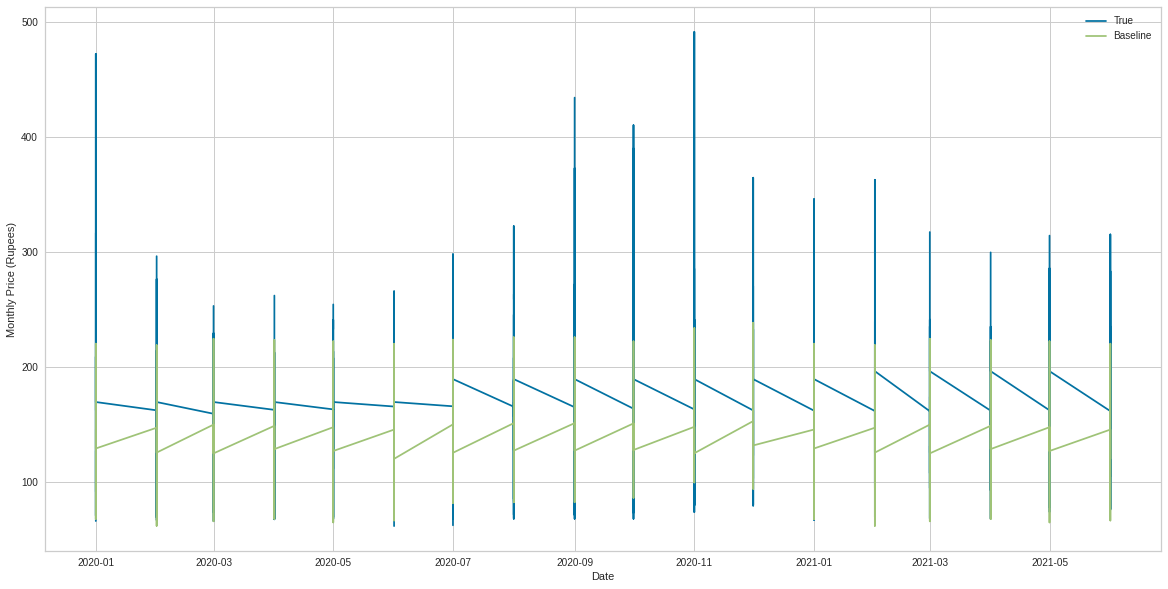

In [32]:
plt.figure(figsize=(20,10))
plot_series(test.index, test['Monthly Price'],"True")
#plot_series(train['ds'],train['y'])
plot_series(test.index, unseen_predictions['Label'],"Baseline")


In [33]:
huber = create_model('huber', verbose = False)
rf = create_model('rf', verbose = False)
lightgbm = create_model('lightgbm', verbose = False)

In [34]:
#xgb = create_model('xgb',verbose=False)
gbr= create_model('gbr',verbose=False)

In [35]:
tuned_rf = tune_model(rf)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,15.2365,403.4582,20.0863,-0.3790,0.1931,0.1614
1,17.9964,581.7918,24.1204,-0.1471,0.2240,0.1879
2,17.9848,660.7035,25.7042,0.1417,0.2486,0.1917
3,24.6803,1670.9304,40.8770,0.1917,0.2673,0.2043
4,26.9599,1844.6926,42.9499,0.1228,0.2679,0.1973
5,29.5922,2123.0815,46.0769,-0.0672,0.2845,0.1877
6,25.2848,1355.9080,36.8227,0.0403,0.2434,0.1805
7,27.1152,1829.9555,42.7780,0.0196,0.2641,0.1849
8,30.2652,1711.8591,41.3746,-0.0798,0.2710,0.2046
9,30.4059,1562.0053,39.5222,-0.1060,0.2778,0.2172


In [36]:
tuned_huber = tune_model(huber)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,14.2307,386.2762,19.6539,-0.3203,0.1865,0.1436
1,16.5736,574.2280,23.9631,-0.1322,0.2181,0.1619
2,18.1562,658.5552,25.6623,0.1445,0.2488,0.1933
3,25.3193,1795.0865,42.3685,0.1316,0.2755,0.2053
4,27.8121,2003.8618,44.7645,0.0471,0.2786,0.2025
5,28.3230,1916.3026,43.7756,0.0368,0.2683,0.1877
6,25.2975,1391.2816,37.2999,0.0152,0.2458,0.1779
7,27.2278,1747.5107,41.8032,0.0638,0.2629,0.1971
8,28.1822,1549.8036,39.3675,0.0224,0.2606,0.1969
9,31.7664,1676.1237,40.9405,-0.1868,0.2924,0.2315


In [37]:
tuned_lightgbm = tune_model(lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,14.8497,435.7270,20.8741,-0.4893,0.2034,0.1452
1,17.5993,681.1147,26.0982,-0.3429,0.2361,0.1732
2,19.8818,740.2927,27.2083,0.0383,0.2578,0.2101
3,23.2478,1173.8280,34.2612,0.4321,0.2496,0.2051
4,26.8016,1573.5281,39.6677,0.2518,0.2631,0.2100
5,26.3436,1415.9535,37.6292,0.2883,0.2424,0.1854
6,23.8528,1190.2299,34.4997,0.1575,0.2288,0.1741
7,26.8558,1464.1388,38.2641,0.2156,0.2457,0.1990
8,27.3477,1418.8310,37.6674,0.1050,0.2466,0.1909
9,30.7935,1585.5168,39.8185,-0.1226,0.2812,0.2303


In [38]:
tuned_gbr = tune_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,14.4061,455.3957,21.3400,-0.5565,0.1923,0.1420
1,15.4458,536.7911,23.1688,-0.0584,0.2085,0.1509
2,19.3658,795.7609,28.2092,-0.0337,0.2594,0.2050
3,22.2862,1101.0513,33.1821,0.4674,0.2437,0.2000
4,24.4669,1296.7356,36.0102,0.3834,0.2430,0.1932
5,25.5917,1347.8225,36.7127,0.3225,0.2392,0.1776
6,23.5328,1176.1628,34.2952,0.1675,0.2212,0.1686
7,25.8410,1321.1744,36.3480,0.2922,0.2394,0.1916
8,24.8321,1223.4726,34.9782,0.2282,0.2339,0.1768
9,29.6007,1488.1330,38.5763,-0.0537,0.2718,0.2163


In [39]:
blend_specific = blend_models(estimator_list = [tuned_rf,tuned_lightgbm,tuned_huber,tuned_gbr])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,13.5001,357.4693,18.9069,-0.2218,0.1785,0.1361
1,15.9924,544.5691,23.3360,-0.0737,0.2118,0.1593
2,18.1336,631.5974,25.1316,0.1795,0.2447,0.1943
3,22.2967,1220.7525,34.9393,0.4094,0.2427,0.1933
4,25.9480,1589.3769,39.8670,0.2442,0.2550,0.1966
5,26.4269,1571.1634,39.6379,0.2102,0.2485,0.1781
6,22.7912,1147.5885,33.8761,0.1877,0.2225,0.1642
7,25.6867,1501.3197,38.7469,0.1957,0.2442,0.1856
8,26.4255,1375.1406,37.0829,0.1326,0.2422,0.1833
9,29.9855,1521.7956,39.0102,-0.0775,0.2761,0.2192


In [40]:
predict_model(blend_specific)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,34.2592,2749.5216,52.4359,0.0466,0.3125,0.2394


,COMM_NAME_Arhar,COMM_NAME_Bajra,COMM_NAME_Barley,COMM_NAME_Beans,COMM_NAME_Bitter gourd,COMM_NAME_Bottle gourd,COMM_NAME_Brinjal,COMM_NAME_Cabbage,COMM_NAME_Carrot,COMM_NAME_Cucumber,COMM_NAME_Ginger (Fresh),COMM_NAME_Gram,COMM_NAME_Jowar,COMM_NAME_Maize,COMM_NAME_Masur,COMM_NAME_Moong,COMM_NAME_Okra (Lady finger),COMM_NAME_Onion,COMM_NAME_Paddy,COMM_NAME_Peas/Chawali,COMM_NAME_Pointed gourd,COMM_NAME_Potato,COMM_NAME_Pumpkin,COMM_NAME_Radish,COMM_NAME_Ragi,COMM_NAME_Rajma,COMM_NAME_Sweet Potato,COMM_NAME_Tapioca,COMM_NAME_Tomato,COMM_NAME_Urad,COMM_NAME_Wheat,COMM_NAME_others_infrequent,COMM_CATEGORY_CEREALS,COMM_CATEGORY_CONDIMENTS & SPICES,COMM_CATEGORY_FRUITS,COMM_CATEGORY_OTHER FOOD ARTICLES,COMM_CATEGORY_PULSES,COMM_CATEGORY_VEGETABLES,Month_1,Month_10,Month_11,Month_12,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_others_infrequent,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,flag_0,Monthly Price,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,112.800003,121.580439
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,159.899994,134.807232
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,107.099998,134.807232
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,140.600006,134.807232
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,126.500000,134.807232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,156.399994,137.273163
2040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,131.800003,136.484578
2041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,95.099998,136.484578
2042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,82.199997,136.484578


In [41]:
final_model = finalize_model(blend_specific)

In [42]:
unseen_predictions_2 = predict_model(final_model, data=test, round=0)
unseen_predictions_2.loc[unseen_predictions_2['Label'] < 0, 'Label'] = 0
unseen_predictions_2.head()

,COMM_NAME,COMM_CATEGORY,Monthly Price,Month,year,flag,Label
Date,,,,,,,
2020-01-01,Paddy,CEREALS,162.3,1,2020,0,144.776267
2020-01-01,Wheat,CEREALS,168.7,1,2020,0,141.639767
2020-01-01,Jowar,CEREALS,177.1,1,2020,0,131.536046
2020-01-01,Bajra,CEREALS,201.6,1,2020,0,147.632077
2020-01-01,Maize,CEREALS,178.8,1,2020,0,137.622996


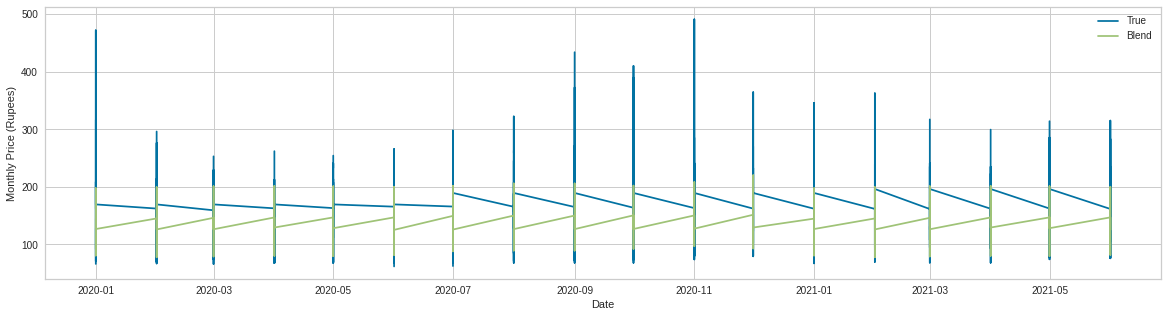

In [43]:
plt.figure(figsize=(20,5))
plot_series(test.index, test['Monthly Price'],"True")
plot_series(test.index, unseen_predictions_2['Label'],'Blend')

In [44]:
#stack_1 = stack_models([tuned_rf,tuned_gbr,tuned_huber,tuned_lightgbm])
#predict_model(stack_1);
#final_stack_1 = finalize_model(stack_1)
#unseen_predictions_3 = predict_model(final_stack_1, data=test, round=1)

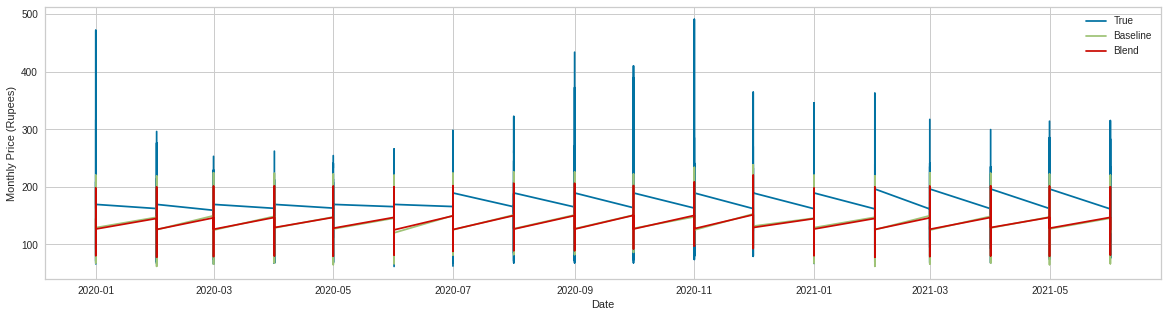

In [45]:
plt.figure(figsize=(20,5))
plot_series(test.index, test['Monthly Price'],"True")
plot_series(test.index, unseen_predictions['Label'],'Baseline')
plot_series(test.index, unseen_predictions_2['Label'],'Blend')